# Classification d'acceptation de prêts

## Introduction

Ce dataset décrit 45000 cas de demande de prêts en fonction de critères et d'informations sur le potentiel emprunteur.

In [28]:
import os
import sys

# Obtenir le chemin du notebook
notebook_path = os.path.abspath('')
print(f"Répertoire actuel : {notebook_path}")

# Se placer dans le répertoire du notebook
os.chdir(notebook_path)

# Vérifier le chemin
print(f"Répertoire de travail : {os.getcwd()}")

Répertoire actuel : /Users/amauryjanin/Library/Mobile Documents/com~apple~CloudDocs/Documents/IMT atlantique/TAF 2A/IA UE D/Projet AAA
Répertoire de travail : /Users/amauryjanin/Library/Mobile Documents/com~apple~CloudDocs/Documents/IMT atlantique/TAF 2A/IA UE D/Projet AAA


La description de l'emprunteur est donnée par :

In [29]:
import pandas as pd
df = pd.read_csv("loan_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [30]:
# Créer un DataFrame avec les informations des colonnes
colonnes_info = {
    'Column': [
        'person_age',
        'person_gender',
        'person_education',
        'person_income',
        'person_emp_exp',
        'person_home_ownership',
        'loan_amnt',
        'loan_intent',
        'loan_int_rate',
        'loan_percent_income',
        'cb_person_cred_hist_length',
        'credit_score',
        'previous_loan_defaults_on_file',
        'loan_status'
    ],
    'Description': [
        'Age of the person',
        'Gender of the person',
        'Highest education level',
        'Annual income',
        'Years of employment experience',
        'Home ownership status (e.g., rent, own, mortgage)',
        'Loan amount requested',
        'Purpose of the loan',
        'Loan interest rate',
        'Loan amount as a percentage of annual income',
        'Length of credit history in years',
        'Credit score of the person',
        'Indicator of previous loan defaults',
        'Loan approval status: 1 = approved; 0 = rejected'
    ],
    'Type': [
        'Float',
        'Categorical',
        'Categorical',
        'Float',
        'Integer',
        'Categorical',
        'Float',
        'Categorical',
        'Float',
        'Float',
        'Float',
        'Integer',
        'Categorical',
        'Integer (Target)'
    ]
}

info_df = pd.DataFrame(colonnes_info)
print(info_df.to_string(index=False))

                        Column                                       Description             Type
                    person_age                                 Age of the person            Float
                 person_gender                              Gender of the person      Categorical
              person_education                           Highest education level      Categorical
                 person_income                                     Annual income            Float
                person_emp_exp                    Years of employment experience          Integer
         person_home_ownership Home ownership status (e.g., rent, own, mortgage)      Categorical
                     loan_amnt                             Loan amount requested            Float
                   loan_intent                               Purpose of the loan      Categorical
                 loan_int_rate                                Loan interest rate            Float
           loan_perc

In [31]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [32]:
df.value_counts()

person_age  person_gender  person_education  person_income  person_emp_exp  person_home_ownership  loan_amnt  loan_intent  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  loan_status
20.0        female         Associate         42674.0        0               RENT                   7000.0     MEDICAL      13.61          0.16                 2.0                         636           Yes                             0              1
29.0        female         Associate         53840.0        7               MORTGAGE               24000.0    MEDICAL      6.91           0.45                 8.0                         680           Yes                             0              1
                                             51488.0        7               RENT                   1600.0     VENTURE      19.16          0.03                 6.0                         526           Yes                             0              1
     

In [33]:
print("Nombre de valeurs uniques par feature :")
print(df.nunique())

Nombre de valeurs uniques par feature :
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


## Gestion des variables qualitatives

La dataset contient plusieurs valeurs qualitative :
- le genre
- l'éducation
- le statut de résidence primaire
- le motif d'emprunt
- le défaut de crédit sur les anciens emprunts

On va donc utiliser la classe LabelEncoder pour transformer ces varaibles qualitative en données numériques. Il faudra peut être classer les 6 différents cas d'éducations de manière qualitative

In [37]:
from sklearn.preprocessing import LabelEncoder

# Créer une copie du dataframe pour préserver l'original
df_encoded = df.copy()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']

# Créer un dictionnaire pour stocker les encoders (utile pour le décodage ultérieur)
label_encoders = {}

# Encoder chaque colonne catégorielle
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    # Afficher le mapping pour comprendre l'encodage
    print(f"\n{col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

# Afficher les premières lignes pour vérifier
print("\n\nPremières lignes après encodage:")
print(df_encoded.head())


person_gender:
  female -> 0
  male -> 1

person_education:
  Associate -> 0
  Bachelor -> 1
  Doctorate -> 2
  High School -> 3
  Master -> 4

person_home_ownership:
  MORTGAGE -> 0
  OTHER -> 1
  OWN -> 2
  RENT -> 3

loan_intent:
  DEBTCONSOLIDATION -> 0
  EDUCATION -> 1
  HOMEIMPROVEMENT -> 2
  MEDICAL -> 3
  PERSONAL -> 4
  VENTURE -> 5

previous_loan_defaults_on_file:
  No -> 0
  Yes -> 1


Premières lignes après encodage:
   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 3        12282.0               0   
2        25.0              0                 3        12438.0               3   
3        23.0              0                 1        79753.0               0   
4        24.0              1                 4        66135.0               1   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0           

On observe que pour les diplômes, ceux-ci peuvent être classés de manière croissante. Puisque LabelEncoder associe un numéro aléatoire à chacun des diplomes, rien n'empêche de les classer selon nos préférences et on peut supposer (à tort peut être) une relation entre certains features.

In [38]:
# Mapping ordinal pour person_education
education_mapping = {
    'High School': 0,
    'Associate': 1,      # Diplôme de 2 ans après high school (community college)
    'Bachelor': 2,       # Licence (4 ans)
    'Master': 3,         # Master
    'Doctorate': 4       # Doctorat
}

# Appliquer le mapping
df_encoded['person_education'] = df['person_education'].map(education_mapping)

# Vérifier le mapping
print("Mapping de person_education:")
for key, value in education_mapping.items():
    print(f"  {key} -> {value}")

print("\nDistribution après encodage:")
print(df_encoded['person_education'].value_counts().sort_index())

Mapping de person_education:
  High School -> 0
  Associate -> 1
  Bachelor -> 2
  Master -> 3
  Doctorate -> 4

Distribution après encodage:
person_education
0    11972
1    12028
2    13399
3     6980
4      621
Name: count, dtype: int64


In [41]:
print(df_encoded['person_income'].describe())
print(df_encoded['person_income'].unique()[:20])

count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64
[ 71948.  12282.  12438.  79753.  66135.  12951.  93471.  95550. 100684.
  12739. 102985.  13113. 114860. 130713. 138998. 600891. 144943. 111369.
 136628.  14283.]


Regardons les différentes corrélations :

array([[<Axes: xlabel='person_education', ylabel='person_education'>,
        <Axes: xlabel='person_income', ylabel='person_education'>],
       [<Axes: xlabel='person_education', ylabel='person_income'>,
        <Axes: xlabel='person_income', ylabel='person_income'>]],
      dtype=object)

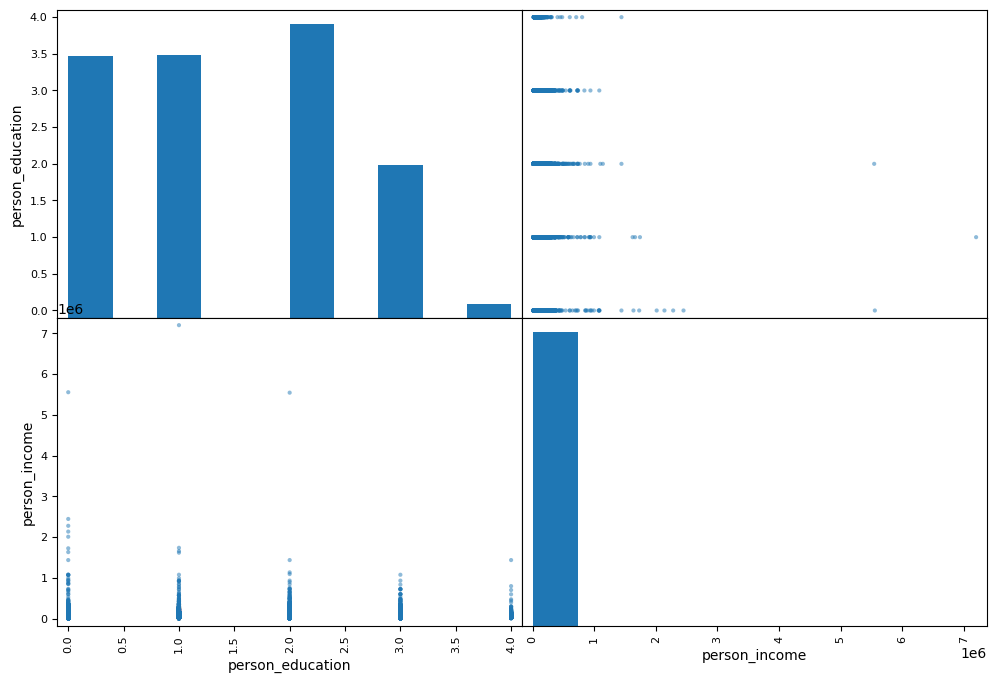

In [40]:
# 'pd' is already imported in another cell; use its plotting module to access scatter_matrix
scatter_matrix = pd.plotting.scatter_matrix
attributes = ["person_education", "person_income"]
scatter_matrix(df_encoded[attributes],figsize=(12,8))

Peut être classer les motifs d'investissement en deux catégories suivant qu'ils sont subis ou souhaités... Plus tard pour améliorer.